# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

# Enlace a drive : https://drive.google.com/drive/folders/1LhCGvpTS3F994r5TpALr3QgX3jSEI0sn?usp=sharing


* El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

### Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

## Objetivo: 

* Identificar operadores ineficientes con base en llamadas perdidas y tiempos de espera.
* Analizar los factores que afectan la eficiencia en la atención de llamadas.
* Proporcionar información útil a los supervisores para mejorar la gestión de operadores.

Todos estos objetivos son de interes para los supervisores de la compañia telefonica y pueden ser usados para La implementacio mejorar la atención telefónica y la identificacion de tarifas o clientes que generan mayor carga operativa.

## Especificar detalles
De acuerdo a los datos asignados, podemos observar que tenemos una tabla con informacion sobre las llamadas y otra 
con los clientes y sus tarifas.

Un operador sera clafificado como ineficaz cuando tenga un valor alto de llamadas perdidas, tiempos de espera largos
y pocas llamadas salientes.

## Hipotesis 

Hipótesis nula (H₀): No hay relación entre la cantidad de llamadas entrantes y la cantidad de llamadas perdidas por operador.
Hipótesis alternativa (H₁): Los operadores con más llamadas entrantes tienen una mayor cantidad de llamadas perdidas.

## Convertir las hipótesis en un plan de acción claro





* Cargar los datasets para analizar los datos

In [89]:
# Importar librerias
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [64]:
# Cargar los datasets para analizar los datos
clientes = pd.read_csv('telecom_clients_us.csv')
llamadas = pd.read_csv('telecom_dataset_us.csv')

* Revisar valores nulos, duplicados y corregir tipos de datos

In [84]:
# Definir funcion para observar los tipos de campos
def ver_datos(df, nombre):
    df.drop_duplicates(inplace = True)
    df.dropna(inplace = True)
    df.reset_index(drop=True, inplace=True)
    print(nombre)
    print(df.info())
    print(display(df))
    print('Duplicados:',df.duplicated().sum())
ver_datos(clientes, "Clientes")
ver_datos(llamadas, "LLamadas")


Clientes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


None
Duplicados: 0
LLamadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41491 entries, 0 to 41490
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              41491 non-null  int64                    
 1   date                 41491 non-null  datetime64[ns, UTC+03:00]
 2   direction            41491 non-null  object                   
 3   internal             41491 non-null  object                   
 4   operator_id          41491 non-null  float64                  
 5   is_missed_call       41491 non-null  bool                     
 6   calls_count          41491 non-null  int64                    
 7   call_duration        41491 non-null  int64                    
 8   total_call_duration  41491 non-null  int64                    
 9   wait_time            41491 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), 

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,26
...,...,...,...,...,...,...,...,...,...,...
41486,168606,2019-11-09 00:00:00+03:00,out,False,957922.0,False,4,551,593,42
41487,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25,25
41488,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,38
41489,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,22


None
Duplicados: 0


In [67]:
# Cambiar tipos de datos de columnas
clientes['date_start'] = pd.to_datetime(clientes['date_start'])
llamadas['date'] = pd.to_datetime(llamadas['date'])

* Realizar el analisis exploratorio de datos. Revisar tipos de llamadas, relaciones entre los tipos de llamadas y
carga de trabajo, llamadas perdidas y carga de trabajo, comparar los tiempos de espera de operadores, comparar 
operadores internos y externos.

In [85]:
# descargar datasets limpios
llamadas.to_csv('llamadas_limpio.csv', index=False)
clientes.to_csv('clientes_limpio.csv', index=False)

# Observar estadisticas promedio para definir a los operadores ineficientes que estaran por debajo de esas estadisticas

In [68]:
# Número total de operadores únicos
num_operators = llamadas['operator_id'].nunique()

# Número total de llamadas
total_calls = llamadas['calls_count'].sum()

# Promedio de llamadas por operador
avg_calls_per_operator = llamadas.groupby('operator_id')['calls_count'].sum().mean()

# Tiempo de espera promedio (total_call_duration - call_duration)
llamadas['wait_time'] = llamadas['total_call_duration'] - llamadas['call_duration']
avg_wait_time = llamadas['wait_time'].mean()

# Tiempo de llamada promedio
avg_call_duration = llamadas['call_duration'].mean()

# Imprimir resultados
print(f"Número total de operadores: {num_operators}")
print(f"Número total de llamadas: {total_calls}")
print(f"Promedio de llamadas por operador: {avg_calls_per_operator:.2f}")
print(f"Tiempo de espera promedio: {avg_wait_time:.2f} segundos")
print(f"Tiempo de llamada promedio: {avg_call_duration:.2f} segundos")

Número total de operadores: 1092
Número total de llamadas: 702085
Promedio de llamadas por operador: 642.93
Tiempo de espera promedio: 312.21 segundos
Tiempo de llamada promedio: 1010.94 segundos


In [69]:
# Calcular el número total de llamadas perdidas
total_missed_calls = llamadas[llamadas['is_missed_call'] == True]['calls_count'].sum()

# Calcular el promedio de llamadas perdidas por operador
avg_missed_calls = llamadas.groupby('operator_id')['calls_count'].apply(lambda x: x[llamadas['is_missed_call'] == True].sum()).mean()

# Imprimir resultados
print(f"Número total de llamadas perdidas: {total_missed_calls}")
print(f"Promedio de llamadas perdidas por operador: {avg_missed_calls:.2f}")

Número total de llamadas perdidas: 272318
Promedio de llamadas perdidas por operador: 249.38


In [70]:
# Filtrar solo las llamadas salientes
llamadas_salientes = llamadas[llamadas['direction'] == 'out']

# Número total de llamadas salientes
total_out_calls = llamadas_salientes['calls_count'].sum()

# Promedio de llamadas salientes por operador
avg_out_calls = llamadas_salientes.groupby('operator_id')['calls_count'].sum().mean()

# Imprimir resultados
print(f"Número total de llamadas salientes: {total_out_calls}")
print(f"Promedio de llamadas salientes por operador: {avg_out_calls:.2f}")

Número total de llamadas salientes: 608343
Promedio de llamadas salientes por operador: 689.73


* Para encontrar a los operadores ineficientes se definieron parametros promedio entre los mismos como:
- La cantidad de llamadas promedio por operador
- Los tiempos de espera promedio de cada operador
- Numero de llamadas salientes promedio por operador

A partir de estos parametros sera analizado cada operador para verificar si sus metricas estan por debajo del promedio

In [71]:
# Identificación de Operadores Ineficientes

# Calcular métricas generales
avg_total_calls = llamadas.groupby('operator_id')['calls_count'].sum().mean()
avg_out_calls = llamadas[llamadas['direction'] == 'out'].groupby('operator_id')['calls_count'].sum().mean()
avg_missed_calls = llamadas[llamadas['is_missed_call'] == True].groupby('operator_id')['calls_count'].sum().mean()
llamadas['wait_time'] = llamadas['total_call_duration'] - llamadas['call_duration']
avg_wait_time = llamadas.groupby('operator_id')['wait_time'].mean().mean()

# Calcular métricas por operador
operadores = llamadas.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    out_calls=('calls_count', lambda x: x[llamadas['direction'] == 'out'].sum()),
    missed_calls=('calls_count', lambda x: x[llamadas['is_missed_call'] == True].sum()),
    avg_wait_time=('wait_time', 'mean')
)
# Filtrar operadores ineficientes (por debajo del promedio en al menos 2 métricas)
poco_eficientes = operadores[

    (operadores['missed_calls'] > avg_missed_calls) &  # Más llamadas perdidas es malo
    (operadores['avg_wait_time'] > avg_wait_time)  # Más tiempo de espera es malo
]
operadores_ineficientes = operadores[

    (operadores['out_calls'] < avg_out_calls) &
    (operadores['missed_calls'] > avg_missed_calls) &  # Más llamadas perdidas es malo
    (operadores['avg_wait_time'] > avg_wait_time)  # Más tiempo de espera es malo
]
# Imprimir resultados
print(f"Operadores poco eficientes encontrados: {len(poco_eficientes)}")
print(poco_eficientes.head())
print(f"Operadores ineficientes encontrados: {len(operadores_ineficientes)}")
print(operadores_ineficientes)

Operadores poco eficientes encontrados: 151
             total_calls  out_calls  missed_calls  avg_wait_time
operator_id                                                     
879898.0            7312       7209          2360     459.690265
882686.0            3650       2884           953     288.763393
882690.0            1588       1417           468     581.761905
884478.0            2292       2270          1155     427.423529
884946.0            1859       1847           704     480.743902
Operadores ineficientes encontrados: 3
             total_calls  out_calls  missed_calls  avg_wait_time
operator_id                                                     
899788.0             603        603           327     296.230769
919128.0             388        388           381     455.444444
953462.0             684        684           462     406.366667


* Al existir tres metricas definidas para la ineficiencia, se decidio que si un operador incumple 2 de estas metricas 
sera clasificado como "poco eficiente" y al incumplir las tres metricas sera "ineficiente"

Luego de verificar las metricas de cada operador se observa que existen 151 poco eficientes y 3 ineficientes.

La recomendacion para los operadores poco eficientes es:
* Compartir con cada operador su rendimiento y sugerencias de mejora de forma personalizada.
* Los operadores ineficientes requieren intervención inmediata con capacitación, monitoreo y posible reasignación.

La recomendacion con los operadores ineficientes: 
* Implementar entrenamientos para mejorar la gestión de llamadas y tiempos de espera.
* Si, después de un periodo de mejora, no hay progreso, considerar reubicarlos o sustituirlos.

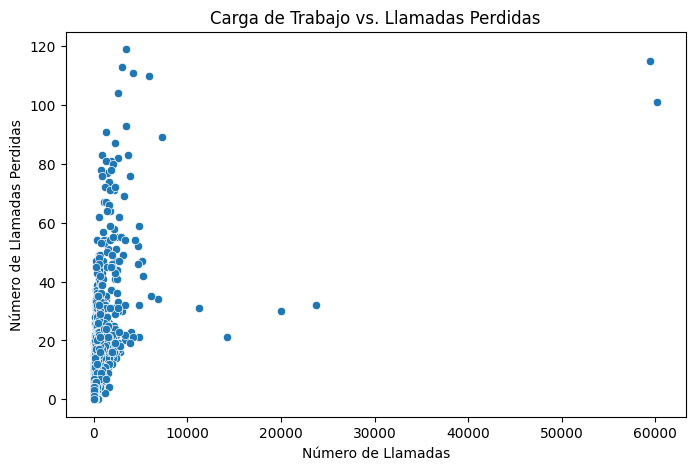

In [97]:
# Relación entre carga de trabajo y llamadas perdidas
calls_grouped = llamadas.groupby("operator_id")[['calls_count', 'is_missed_call']].sum()
plt.figure(figsize=(8,5))
sns.scatterplot(data=calls_grouped, x="calls_count", y="is_missed_call")
plt.title("Carga de Trabajo vs. Llamadas Perdidas")
plt.xlabel("Número de Llamadas")
plt.ylabel("Número de Llamadas Perdidas")
plt.show()

* Filtrar el numero de llamadas entre 0 y 10,000

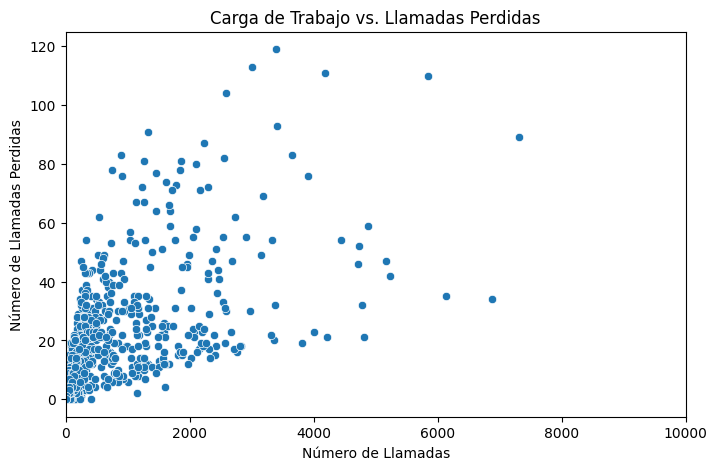

In [96]:
# Agrupar por operador y sumar las llamadas y las llamadas perdidas
calls_grouped = llamadas.groupby("operator_id")[['calls_count', 'is_missed_call']].sum()

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=calls_grouped, x="calls_count", y="is_missed_call")

# Título y etiquetas del gráfico
plt.title("Carga de Trabajo vs. Llamadas Perdidas")
plt.xlabel("Número de Llamadas")
plt.ylabel("Número de Llamadas Perdidas")

# Limitar el eje X entre 0 y 10,000
plt.xlim(0, 10000)

# Mostrar el gráfico
plt.show()

# Probar Hipotesis
*Hipótesis nula (H₀): No hay relación entre la cantidad de llamadas entrantes y la cantidad de llamadas perdidas por operador.
*Hipótesis alternativa (H₁): Los operadores con más llamadas entrantes tienen una mayor cantidad de llamadas perdidas.

In [ ]:

# Calcular llamadas entrantes y perdidas por operador
operador_llamadas = llamadas[llamadas['direction'] == 'in'].groupby('operator_id')['calls_count'].sum()
operador_llamadas_perdidas = llamadas[llamadas['is_missed_call'] == True].groupby('operator_id')['calls_count'].sum()

# Alinear las series por operator_id
data = pd.DataFrame({
    'in_calls': operador_llamadas,
    'missed_calls': operador_llamadas_perdidas
}).dropna()

# Calcular correlación de Pearson
corr_pearson, p_value_pearson = pearsonr(data['in_calls'], data['missed_calls'])

# Calcular correlación de Spearman
corr_spearman, p_value_spearman = spearmanr(data['in_calls'], data['missed_calls'])

# Mostrar los resultados
print(f"Correlación de Pearson: {corr_pearson}, p-valor: {p_value_pearson}")
print(f"Correlación de Spearman: {corr_spearman}, p-valor: {p_value_spearman}")

# Determinar si se rechaza o no la hipótesis nula (H₀)
if p_value_pearson < 0.05:
    print("Rechazamos la hipótesis nula (H₀): Existe una relación entre llamadas entrantes y llamadas perdidas.")
else:
    print("No rechazamos la hipótesis nula (H₀): No existe una relación significativa entre llamadas entrantes y llamadas perdidas.")

Correlación de Pearson: 0.19784722110703218, p-valor: 2.0573925839406617e-06
Correlación de Spearman: 0.47365434871829887, p-valor: 4.76965599227695e-33
Rechazamos la hipótesis nula (H₀): Existe una relación entre llamadas entrantes y llamadas perdidas.


* Existe una relación significativa entre el número de llamadas entrantes y las llamadas perdidas.
* Esta relacion confirma nuestra hipotesis, por lo tanto los operadoores con un mayor numero de llamadas entrantes tienden a perder mas llamadas.

## Conclusiones

En resumen, este análisis proporciona una visión clara de las áreas de mejora para los operadores del servicio CallMeMaybe. Al mejorar el manejo de las llamadas entrantes y optimizar el tiempo de espera, es posible reducir significativamente las llamadas perdidas y mejorar la eficiencia general del servicio. La intervención específica en operadores ineficientes y la capacitación general pueden llevar a un servicio más fluido y eficiente.

* Recomendaciones:

* Optimizar el Enrutamiento de Llamadas: Existe una relación entre el número de llamadas entrantes y las perdidas, puede que los operadores estén sobrecargados. Se podría optimizar el sistema de enrutamiento de llamadas para distribuir las llamadas de manera más eficiente.

* Capacitación de Operadores: Realizar entrenamientos sobre gestión de llamadas entrantes y manejo de llamadas perdidas, especialmente para aquellos operadores con mayor volumen de llamadas.

# Referencias

Correlacion Estadistica:
Instituto Clavijero. (s.f.). Probabilidad y estadística – Semana 4. Belver Clavijero. Recuperado el 19 de marzo de 2025, de https://belver.clavijero.edu.mx/cursos/nme/semestre5/probyest_1/s4/contenidos/index.html

T-Test:
Sánchez Turcios, R. A. (2015). t-Student. Usos y abusos. Revista Mexicana de Cardiología, 26(1), []. Recuperado de https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0188-21982015000100009

Xtics:
Matplotlib Developers. (s.f.). matplotlib.pyplot.xticks. Matplotlib. Recuperado el 19 de marzo de 2025, de https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

Heatmap:
Waskom, M. L. (s.f.). seaborn.heatmap. Seaborn. Recuperado el 19 de marzo de 2025, de https://seaborn.pydata.org/generated/seaborn.heatmap.html

Boxplot:
Matplotlib Developers. (s.f.). matplotlib.pyplot.boxplot. Matplotlib. Recuperado el 19 de marzo de 2025, de https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html